In [1]:
import math
import torch
import hess
import matplotlib.pyplot as plt
from hess.nets import Transformer
import hess.loss_surfaces as loss_surfaces
from hess.data import data_loader
import numpy as np
import sklearn.datasets as datasets

In [2]:
def twospirals(n_points, noise=.5, random_state=920):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 600 * (2*np.pi)/360
    d1x = -1.5*np.cos(n)*n + np.random.randn(n_points,1) * noise
    d1y =  1.5*np.sin(n)*n + np.random.randn(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))),
            np.hstack((np.zeros(n_points),np.ones(n_points))))

In [3]:
X, Y = twospirals(500, noise=1.3)

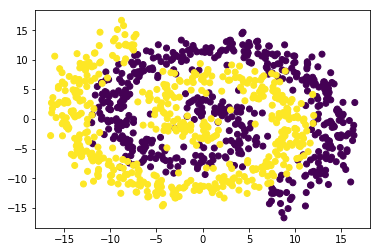

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y)

In [5]:
train_x = torch.FloatTensor(X)

In [6]:
train_y = torch.FloatTensor(Y).unsqueeze(-1)

In [7]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    torch.cuda.set_device(2)
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
    train_x, train_y = train_x.cuda(), train_y.cuda()

In [8]:
optimus = Transformer(train_x, train_y, net=hess.nets.MoonNet, n_hidden=5, hidden_size=20,
                     activation=torch.nn.ELU(), bias=True)

In [9]:
print(sum(p.numel() for p in optimus.net.parameters()))

1761


In [10]:
if use_cuda:
    optimus = optimus.cuda()

In [11]:
optimus.train_net(print_loss=True, lr=0.01, iters=4000,
                 loss_func=torch.nn.BCEWithLogitsLoss())

tensor(0.6943, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6564, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6428, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6496, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6401, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6327, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6348, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6349, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6292, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6237, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6224, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6200, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6135, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6087, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.6058, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.5987, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1203, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1204, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1210, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1233, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1292, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1429, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1547, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1347, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1193, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1385, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1291, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1215, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1322, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1185, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1268, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1226, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.1059, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1097, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1205, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1323, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1413, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1284, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1096, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1119, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1216, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1118, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1052, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1163, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1073, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1039, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1112, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1042, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0902, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0894, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0893, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0894, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0891, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0873, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0889, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0882, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0878, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0873, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0880, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0871, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0870, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0869, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0870, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0878, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0909, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0904, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0855, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0813, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0877, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0801, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0843, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0790, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0850, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0824, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0815, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0786, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0802, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0791, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0792, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0771, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0794, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1099, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1200, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1025, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1482, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1492, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1240, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1480, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1054, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1320, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1323, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1089, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1233, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0945, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.1219, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0913, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0715, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0697, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0698, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0695, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0679, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0689, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0648, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0691, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0646, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0672, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0655, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0651, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0649, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0644, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0651, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0633, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0588, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0585, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0584, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0583, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0581, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0580, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0579, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0576, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0576, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0574, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0573, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0572, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0570, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0569, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0568, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0567, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0553, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0552, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0551, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0549, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0548, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0547, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0545, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0544, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0543, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0542, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0541, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0539, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0538, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0537, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0536, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0535, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0530, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0529, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0527, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0526, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0525, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0524, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0523, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0521, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0520, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0519, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0518, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0517, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0516, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0515, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0514, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0512, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0525, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0522, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0523, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0518, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0519, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0515, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0515, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0513, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0512, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0510, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0509, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0506, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0507, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0504, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0504, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0502, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0451, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0448, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0445, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0446, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0446, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0442, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0445, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0445, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0444, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0445, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0448, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0456, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0460, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0482, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0497, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0447, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0441, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0442, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0441, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0438, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0440, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0437, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0436, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0434, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0433, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0433, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0432, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0431, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0429, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0428, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0428, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0449, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0446, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0442, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0444, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0440, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0440, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0437, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0437, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0434, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0434, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0433, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0431, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0430, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0429, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0428, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0426, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0502, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0485, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0489, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0498, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0486, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0450, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0478, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0459, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0460, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0464, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0446, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0440, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0452, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0449, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0434, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0433, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0706, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0744, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0744, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0712, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0648, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0601, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0600, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0640, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0548, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0499, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0543, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0542, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0540, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0519, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0454, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0486, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0403, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0399, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0406, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0365, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0351, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0344, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0340, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0343, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0340, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0340, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0344, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0351, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0381, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0398, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0452, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0470, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0386, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0385, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0384, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0383, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0382, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0381, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0380, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0379, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0378, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0377, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0376, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0375, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0374, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0373, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0372, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0371, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0367, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0440, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0382, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0366, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0431, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0388, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0359, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0418, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0377, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0355, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0405, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0377, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0352, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0393, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0382, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0345, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0446, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0386, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0423, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0465, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0396, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0470, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0483, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0416, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0506, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0449, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0422, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0488, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0405, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0411, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0436, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0366, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0337, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0328, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0322, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0322, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0326, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0327, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0338, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0350, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0344, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0329, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0325, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0325, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0323, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0321, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0331, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0344, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0323, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0320, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0321, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0319, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0318, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0318, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0317, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0316, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0315, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0313, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0313, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0312, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0311, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0310, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0813, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0516, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0600, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0678, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0622, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0596, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0564, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0461, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0583, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0436, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0516, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0492, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0515, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0393, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0515, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0418, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0283, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0289, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0285, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0290, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0289, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0293, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0294, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0305, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0296, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0295, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0286, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0285, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0284, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0291, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0297, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0315, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0340, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0303, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0312, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0314, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0284, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0275, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0295, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0304, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0279, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0274, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0272, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0282, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0286, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0276, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0265, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0286, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0263, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0265, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0264, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0262, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0262, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0263, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0262, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0260, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0260, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0261, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0260, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0259, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0258, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0259, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0259, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0258, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0421, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0593, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0746, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0861, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0485, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0796, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0644, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0846, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0916, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0652, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0605, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0950, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0434, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0923, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0886, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0609, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0258, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0257, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0257, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0257, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0256, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0256, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0255, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0255, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0255, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0254, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0254, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0254, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0253, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0253, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0252, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0252, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0265, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0252, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0270, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0272, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0252, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0271, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0280, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0256, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0280, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0294, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0256, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0283, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0306, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0258, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0298, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0305, grad_fn=<BinaryCrossEntropyWithLogitsBac

tensor(0.0469, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0492, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0739, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)
tensor(0.0551, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


## Let's get this bread

In [13]:
import hess.utils as utils

In [14]:
model = optimus.net.cuda()
par_list = model.parameters()
n_par = sum(torch.numel(p) for p in par_list)

In [15]:
hessian = torch.zeros(n_par, n_par)
for pp in range(n_par):
    base_vec = torch.zeros(n_par).unsqueeze(0).cuda()
    base_vec[0, pp] = 1.
    
    base_vec = utils.unflatten_like(base_vec, model.parameters())
    utils.eval_hess_vec_prod(base_vec, model.parameters(),
                            net=model,
                            criterion=torch.nn.BCEWithLogitsLoss(),
                            inputs=train_x, targets=train_y)
    if pp == 0:
        output = utils.gradtensor_to_tensor(model, include_bn=True)
        hessian = torch.zeros(output.nelement(), output.nelement())
        hessian[:, pp] = output
    
#     print(pp)
    hessian[:, pp] = utils.gradtensor_to_tensor(optimus.net, include_bn=True).cpu()

In [16]:
hessian = hessian.cpu()

In [17]:
torch.cuda.empty_cache()

In [18]:
e_val, e_vec = np.linalg.eig(hessian.cpu())
idx = np.abs(e_val).argsort()[::-1]   
e_val = torch.FloatTensor(e_val[idx].real)
e_vec = torch.FloatTensor(e_vec[:,idx].real)

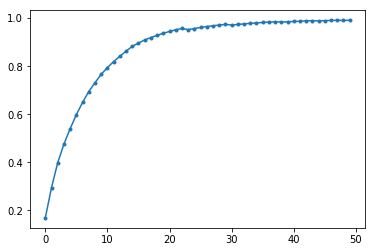

In [19]:
ne = e_val.div(torch.sum(e_val))
plt.plot(np.cumsum(ne[:50].cpu()), marker=".")

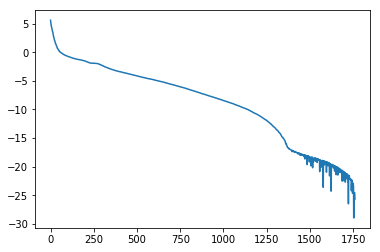

In [20]:
plt.plot(np.log(np.abs(e_val)))

## Save model to use on laptop

In [21]:
torch.save(optimus.net.state_dict(), "../hess/saved-models/spirals.pt")
saved_pars = optimus.net.state_dict()

In [22]:
torch.save(hessian, "../hess/saved-models/spirals_hessian.pt")

## Do Some Perturbing

In [23]:
torch.set_default_tensor_type(torch.FloatTensor)
optimus = optimus.cpu();

In [24]:
from hess.plotting import plot_decision_boundary

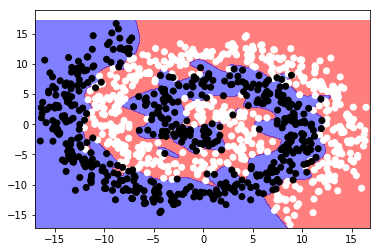

In [25]:
plot_decision_boundary(train_x, train_y, optimus, use_cuda=False,
                      buffer=0.5, h=0.1)

## Average Over Large Curvature Perturbations

In [26]:
buffer = 0.3
h = 0.1
x_min, x_max = train_x[:, 0].min() - buffer, train_x[:, 0].max() + buffer
y_min, y_max = train_x[:, 1].min() - buffer, train_x[:, 1].max() + buffer

xx,yy=np.meshgrid(np.arange(x_min.cpu(), x_max.cpu(), h), 
                  np.arange(y_min.cpu(), y_max.cpu(), h))
in_grid = torch.FloatTensor([xx.ravel(), yy.ravel()]).t()

In [27]:
n_vec = 3
scale = 0.0
basis = e_vec[:, :n_vec]
n_trial = 1
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    optimus.net.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, optimus.net.parameters())
    for i, par in enumerate(optimus.net.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = torch.sigmoid(optimus.net(in_grid, temp=1.).squeeze().cpu())

In [28]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)

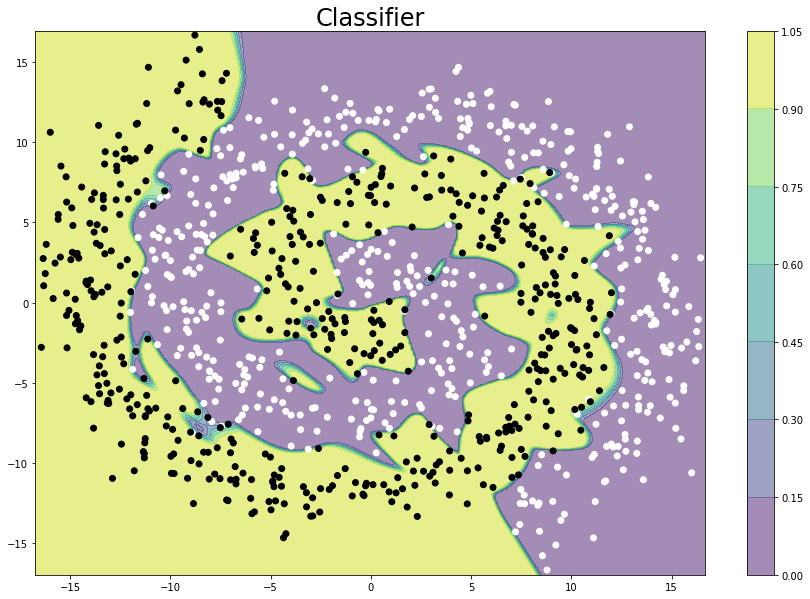

In [79]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
# plt.title("Temp Scaled", fontsize=24)
plt.title("Classifier", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)
plt.savefig("./two-spiral-classifier.pdf", bbox_inches="tight")

## Small Curvature

In [30]:
n_vec = 3
scale = 0.5
basis = e_vec[:, -n_vec:]
n_trial = 1
pred = torch.zeros(in_grid.size(0), n_trial).cpu()
for tt in range(n_trial):
    optimus.net.load_state_dict(saved_pars)
    wghts = torch.randn(n_vec).cpu()
    perturb = basis.matmul(wghts.unsqueeze(-1)).t()
    perturb = perturb.div(perturb.norm()).mul(scale)

    perturb = utils.unflatten_like(perturb, optimus.net.parameters())
    for i, par in enumerate(optimus.net.parameters()):
        par.data = par.data + perturb[i]
        
    pred[:, tt] = torch.sigmoid(optimus(in_grid).squeeze().cpu())

In [31]:
avg_pred = pred.mean(1).detach().numpy().reshape(xx.shape)

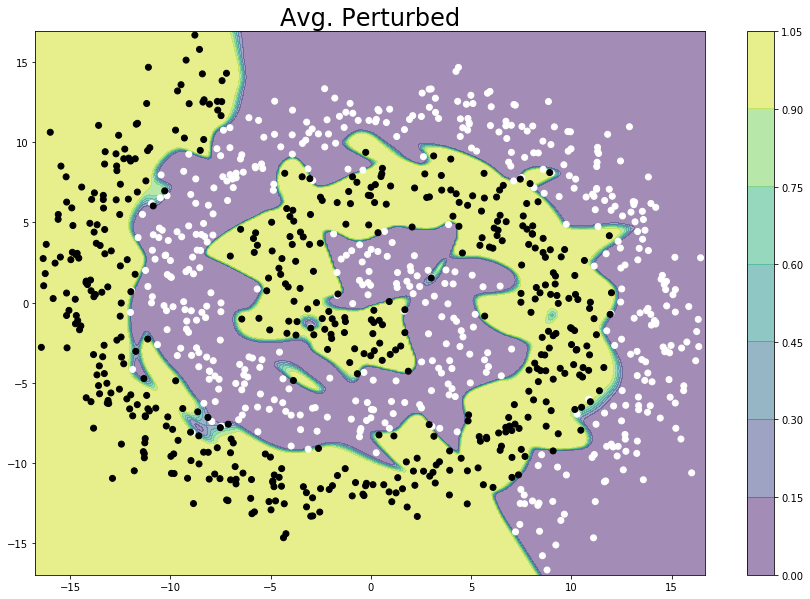

In [32]:
plt.figure(figsize=(15, 10))
plt.contourf(xx, yy, avg_pred, alpha=0.5)
plt.title("Avg. Perturbed", fontsize=24)
plt.colorbar()
plt.scatter(train_x[:, 0].cpu(), train_x[:, 1].cpu(), c=train_y[:, 0].cpu(), cmap=plt.cm.binary)

## Get Loss Surfaces

In [58]:
basis = e_vec
full_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

In [59]:
nvec = 3
basis = e_vec[:, :nvec]
high_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

In [118]:
nvec = 1750
basis = e_vec[:, -n_vec:]
low_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

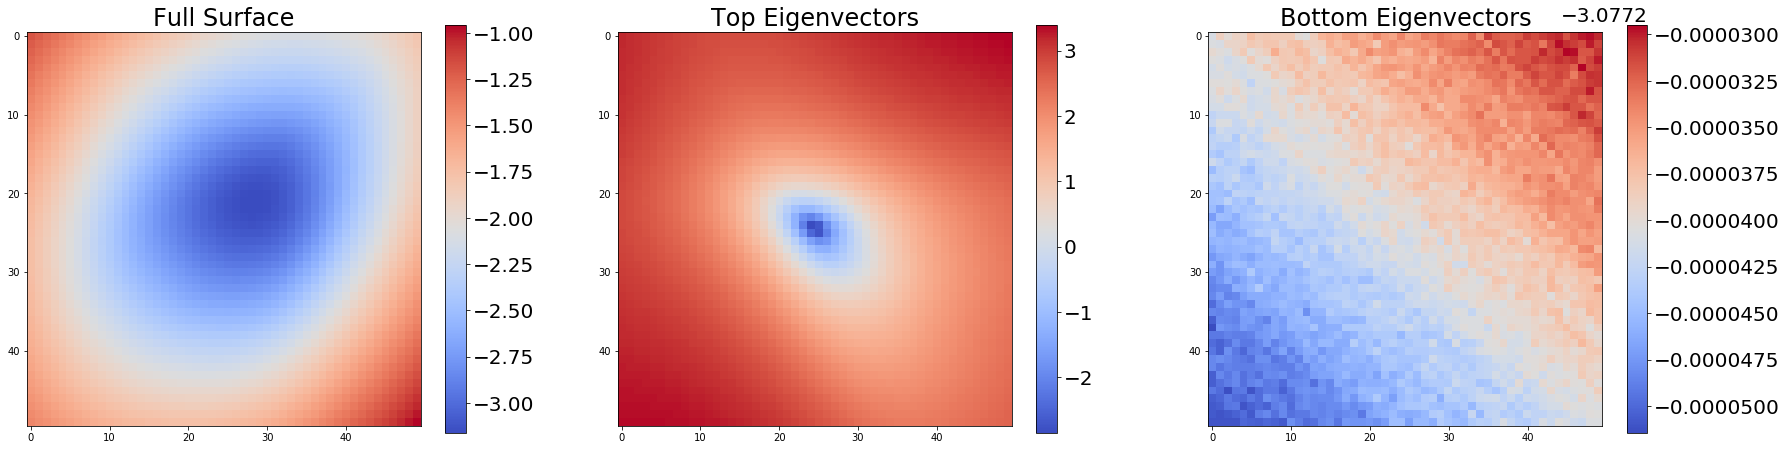

In [119]:
fig, ax = plt.subplots(1, 3, figsize=(30, 7.5))
im = ax[0].imshow(full_loss_surface.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[0])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[0].set_title("Full Surface",
               fontsize=24)

im = ax[1].imshow(high_loss_surface.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[1])
cbar.ax.tick_params(labelsize=20)
ax[1].set_title("Top Eigenvectors",
               fontsize=24)

im = ax[2].imshow(low_loss_surface.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[2])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[2].set_title("Bottom Eigenvectors",
               fontsize=24);
plt.savefig("./spiral-loss-surface.pdf", bbox_inches="tight")
plt.show()

In [84]:
nvec = 1000
basis = e_vec[:, -n_vec:]
low_loss_surface = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=1., n_pts=50, scale=1.,
                                             use_cuda=True)

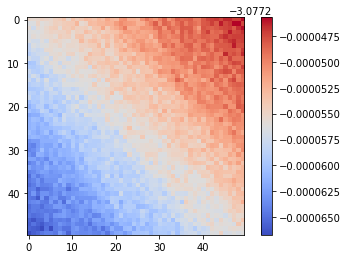

In [85]:
plt.imshow(low_loss_surface.log().detach(), cmap="coolwarm")
plt.colorbar()

In [120]:
nvec = 1750
basis = e_vec
ls1 = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=1.,
                                             use_cuda=True)

In [121]:
basis = e_vec[:, -n_vec:]
ls2 = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=1.,
                                             use_cuda=True)
ls3 = loss_surfaces.get_loss_surface(basis, optimus.net.cuda(),
                                             train_x, train_y,
                                             loss=torch.nn.BCEWithLogitsLoss(),
                                             rng=10., n_pts=50, scale=1.,
                                             use_cuda=True)

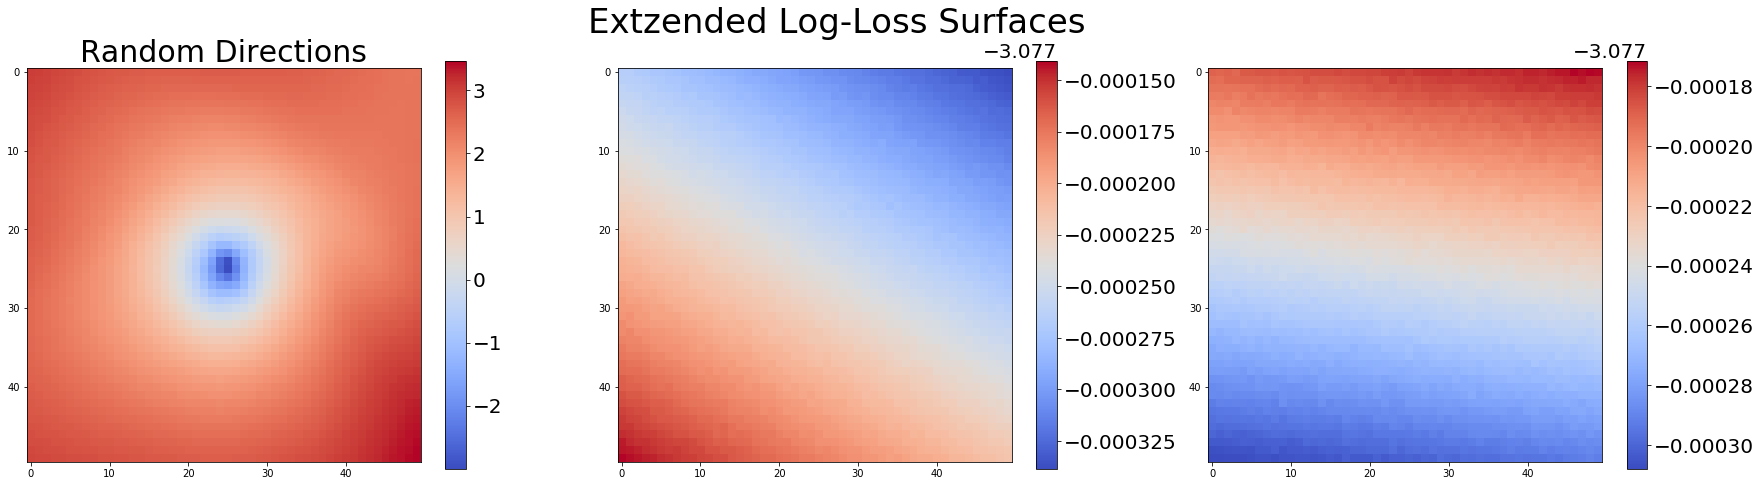

In [122]:
fig, ax = plt.subplots(1, 3, figsize=(30, 7.5))
im = ax[0].imshow(ls1.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[0])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
ax[0].set_title("Random Directions",
               fontsize=30)

im = ax[1].imshow(ls2.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[1])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
# ax[1].set_title("Top Eigenvectors",
#                fontsize=24)

im = ax[2].imshow(ls3.log().detach(), cmap='coolwarm')
cbar=fig.colorbar(im, ax=ax[2])
cbar.ax.tick_params(labelsize=20)
cbar.ax.yaxis.offsetText.set(size=20)
# ax[2].set_title("Bottom Eigenvectors",
#                fontsize=24);
fig.suptitle("Extzended Log-Loss Surfaces", fontsize=34)
plt.savefig("./ext-loss-surface.pdf", bbox_inches="tight")
plt.show()